In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
%matplotlib notebook

In [3]:
ls

Aceh.xlsx*             Kalsel.xlsx*       Pop_2017.xlsx*
Bali.xlsx*             Kalteng.xlsx*      Populasi.xls*
Bangka Belitung.xlsx*  Kaltim.xlsx*       Populasi.xlsx*
Banten.xlsx*           Kalut.xlsx*        Riau.xlsx*
Bengkulu 1.xlsx*       Kepri.xlsx*        Scraping-Rekap-UN-2017.xlsx*
coba.xlsx*             Lampung.xlsx*      Sulbar.xlsx*
DKI Yogya.xlsx*        Maluku.xlsx*       Sulsel.xlsx*
Finish.png*            Malut.xlsx*        Sultenggara.xlsx*
Gorontalo.xlsx*        NTB.xlsx*          Sulteng.xlsx*
Jakarta.xlsx*          NTT.xlsx*          Sulut.xlsx*
Jambi.xlsx*            Papua Barat.xlsx*  Sumbar.xlsx*
Jawa Barat.xlsx*       Papua.xlsx*        Sumsel.xlsx*
Jawa Tengah.xlsx*      PDRB.xlsx*         Sumut.xlsx*
Jawa Timur.xlsx*       PER Kpt.xlsx*      Training.ipynb*
Kalbar.xlsx*           Pop_2017.xls*


In [4]:
data = ['Aceh.xlsx', 'Bali.xlsx', 'Bangka Belitung.xlsx', 'Banten.xlsx', 'Bengkulu 1.xlsx', 'DKI Yogya.xlsx', 'Gorontalo.xlsx', 'Jakarta.xlsx', 'Jambi.xlsx', 
       'Jawa Barat.xlsx', 'Jawa Tengah.xlsx', 'Jawa Timur.xlsx', 'Kalbar.xlsx', 'Kalsel.xlsx', 'Kalteng.xlsx', 'Kaltim.xlsx', 'Kalut.xlsx', 'Kepri.xlsx', 'Lampung.xlsx', 'Maluku.xlsx', 'Malut.xlsx', 'NTB.xlsx', 'NTT.xlsx', 'Papua Barat.xlsx', 'Papua.xlsx', 'Riau.xlsx', 'Sulbar.xlsx', 'Sulsel.xlsx', 'Sultenggara.xlsx',
        'Sulteng.xlsx', 'Sulut.xlsx', 'Sumbar.xlsx', 'Sumsel.xlsx', 'Sumut.xlsx']

In [5]:
provinsi = ['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'Gorontalo', 'DKI Jakarta', 'Jambi', 
       'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara',
          'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua Barat', 'Papua', 'Riau', 'Sulawesi Barat',
          'Sulawesi Selatan', 'Sulawesi Tenggara',
        'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara']

In [6]:
coba = pd.read_excel('Bangka Belitung.xlsx')
coba = coba.sort_values(['Rerata IPA tahun 2017'], ascending=False)
coba.head()

,Kode Sekolah,NPSN,Nama Sekolah,Status,Jumlah Peserta,Rerata IPA tahun 2017,IIUN tahun 2017,Rerata IPA tahun 2016,IIUN tahun 2016,Rerata IPA tahun 2015,IIUN tahun 2015
0,2806001,10900459,"SMA NEGERI 1 TANJUNGPANDAN, BELITUNG",Negeri,104,71.40,"UNBK"" style=""text-align: right; width: 80px;"">...",62.55,"89.06"" style=""text-align: right; width: 80px;...",65.13,"89.99"" style=""text-align: right; width: 80px;..."
1,2801001,10901104,"SMA NEGERI 1 TAMANSARI, PANGKALPINANG",Negeri,183,68.10,"UNBK"" style=""text-align: right; width: 80px;"">...",63.09,"UNBK"" style=""text-align: right; width: 80px;"">...",62.62,"86.26"" style=""text-align: right; width: 80px;..."
2,2802001,10900232,"SMA NEGERI 1 SUNGAILIAT, BANGKA",Negeri,166,64.92,"UNBK"" style=""text-align: right; width: 80px;"">...",56.25,"UNBK"" style=""text-align: right; width: 80px;"">...",62.62,"87.13"" style=""text-align: right; width: 80px;..."
3,2807001,10901003,"SMA NEGERI 1 MANGGAR, BELITUNG TIMUR",Negeri,83,64.91,"UNBK"" style=""text-align: right; width: 80px;"">...",56.81,"UNBK"" style=""text-align: right; width: 80px;"">...",53.19,"86.11"" style=""text-align: right; width: 80px;..."
4,2802004,10900238,"SMA NEGERI 1 BELINYU, BANGKA",Negeri,64,64.63,"UNBK"" style=""text-align: right; width: 80px;"">...",47.84,"76.17"" style=""text-align: right; width: 80px;...",57.52,"77.41"" style=""text-align: right; width: 80px;..."


In [7]:
coba['Rerata IPA tahun 2017'].min()

37.039999999999999

In [8]:
coba.columns

Index(['Kode\nSekolah', 'NPSN', 'Nama Sekolah', 'Status', 'Jumlah\nPeserta',
       'Rerata IPA tahun 2017', 'IIUN tahun 2017', 'Rerata IPA tahun 2016',
       'IIUN tahun 2016', 'Rerata IPA tahun 2015', 'IIUN tahun 2015'],
      dtype='object')

In [9]:
def koreksi(y):
    if y.startswith('UNBK') == True:
        return 'UNBK'
    elif y[1].isdigit() == True:
        return float(y[:5])
    else:
        return 0

In [10]:
coba['IIUN tahun 2017'] = coba['IIUN tahun 2017'].apply(koreksi)

In [11]:
coba['IIUN tahun 2016'] = coba['IIUN tahun 2016'].apply(koreksi)
coba['IIUN tahun 2015'] = coba['IIUN tahun 2015'].apply(koreksi)

In [12]:
for i in coba.columns:
    print(i)

Kode
Sekolah
NPSN
Nama Sekolah
Status
Jumlah
Peserta
Rerata IPA tahun 2017
IIUN tahun 2017
Rerata IPA tahun 2016
IIUN tahun 2016
Rerata IPA tahun 2015
IIUN tahun 2015


In [13]:
maks = []
medians = []
mins = []
means = []

In [14]:
def pisah(x):
    global maks
    global medians
    global mins
    global meanss
    for i in x:
        a = pd.read_excel(i)
        a = a.sort_values('Rerata IPA tahun 2017')
        a['IIUN tahun 2017'] = a['IIUN tahun 2017'].apply(koreksi)
        a = a[a['IIUN tahun 2017'] == 'UNBK']
        a = a.sort_values('Rerata IPA tahun 2017')
        maks.append(a['Rerata IPA tahun 2017'].max())
        medians.append(a['Rerata IPA tahun 2017'].median())
        mins.append(a['Rerata IPA tahun 2017'].min())
        means.append(a['Rerata IPA tahun 2017'].mean())

In [15]:
pisah(data)

In [16]:
df = pd.DataFrame(maks)
df.columns = ['Max']
df['Median'] = medians
df['Min'] = mins
df['Mean'] = means

In [17]:
df.index = provinsi

In [18]:
df['Provinsi'] = provinsi

In [19]:
df

,Max,Median,Min,Mean,Provinsi
Aceh,75.50,38.375,27.61,40.296296,Aceh
Bali,81.54,62.420,43.89,61.199744,Bali
Bangka Belitung,71.40,50.130,37.04,51.987105,Bangka Belitung
Banten,76.63,44.460,34.68,48.618397,Banten
Bengkulu,73.45,47.070,35.23,48.836809,Bengkulu
DI Yogyakarta,80.95,61.170,46.26,62.851014,DI Yogyakarta
Gorontalo,65.27,43.860,34.02,44.041250,Gorontalo
DKI Jakarta,86.54,64.760,41.40,65.837949,DKI Jakarta
Jambi,72.10,45.645,35.01,46.653514,Jambi
Jawa Barat,80.24,49.200,35.48,51.149879,Jawa Barat


# Jos

<IPython.core.display.Javascript object>


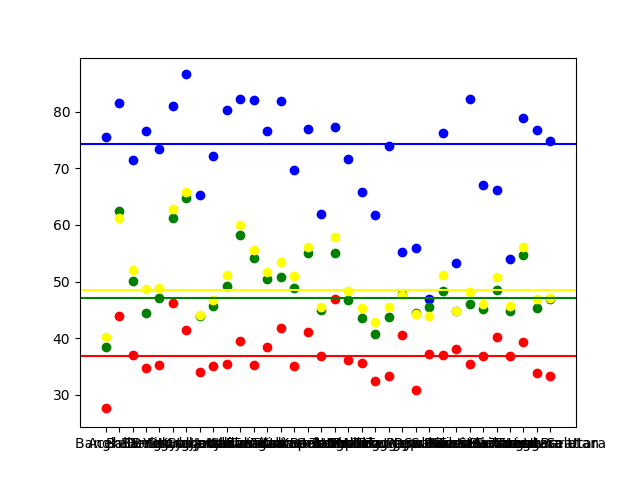

In [20]:
plt.figure()

plt.scatter(df.index, df['Max'], picker=5, c='blue')
plt.scatter(df.index, df['Min'], picker=5, c='red')
plt.scatter(df.index, df['Median'], picker=5, c='green')
plt.scatter(df.index, df['Mean'], picker=5, c='yellow')
plt.axhline(df['Max'].median(), color='blue')
plt.axhline(df['Min'].median(), color='red')
plt.axhline(df['Median'].median(), color='green')
plt.axhline(df['Mean'].median(), color='yellow')

# Okay We Ready

In [21]:
coba_baru = [w for w in range(len(df))]

In [22]:
df_2 = df.copy()

In [23]:
df_2.index = coba_baru

In [24]:
df_2

,Max,Median,Min,Mean,Provinsi
0,75.50,38.375,27.61,40.296296,Aceh
1,81.54,62.420,43.89,61.199744,Bali
2,71.40,50.130,37.04,51.987105,Bangka Belitung
3,76.63,44.460,34.68,48.618397,Banten
4,73.45,47.070,35.23,48.836809,Bengkulu
5,80.95,61.170,46.26,62.851014,DI Yogyakarta
6,65.27,43.860,34.02,44.041250,Gorontalo
7,86.54,64.760,41.40,65.837949,DKI Jakarta
8,72.10,45.645,35.01,46.653514,Jambi
9,80.24,49.200,35.48,51.149879,Jawa Barat


In [25]:
Jawa = ['DI Yogyakarta', 'Jawa Timur', 'Jawa Barat', 'Jawa Tengah', 'DKI Jakarta', 'Banten']
Bali_Nusa = ['Bali', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat']
Maluku_Papua = ['Maluku', 'Maluku Utara', 'Papua', 'Papua Barat']
Sulawesi = ['Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Tengah', 'Sulawesi Utara', 'Gorontalo']
Sumatera = ['Sumatera Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Lampung', 'Kepulauan Riau', 'Bengkulu', 'Aceh',
           'Riau', 'Bangka Belitung', 'Jambi']
Kalimantan = ['Kalimantan Utara', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur']

In [26]:
warna = []

In [27]:
def pick_color(province):
    global warna
    global Jawa
    global Bali_Nusa
    global Maluku_Papua
    global Sulawesi
    global Sumatera
    global Kalimantan
    for i in province:
        if i in Jawa:
            warna.append('blue')
        if i in Bali_Nusa:
            warna.append('yellow')
        if i in Maluku_Papua:
            warna.append('grey')
        if i in Sulawesi:
            warna.append('green')
        if i in Sumatera:
            warna.append('red')
        if i in Kalimantan:
            warna.append('orange')

In [28]:
pick_color(provinsi)

In [29]:
c = [a for a in df_2['Provinsi']]

In [30]:
for i in c:
    if len(i) > 13:
        print(c.index(i), i)

2 Bangka Belitung
12 Kalimantan Barat
13 Kalimantan Selatan
14 Kalimantan Tengah
15 Kalimantan Timur
16 Kalimantan Utara
17 Kepulauan Riau
21 Nusa Tenggara Barat
22 Nusa Tenggara Timur
26 Sulawesi Barat
27 Sulawesi Selatan
28 Sulawesi Tenggara
29 Sulawesi Tengah
30 Sulawesi Utara
31 Sumatera Barat
32 Sumatera Selatan
33 Sumatera Utara


In [31]:
c[2] = 'B. Belitung'
c[12] = 'Kal. Barat'
c[13] = 'Kal. Selatan'
c[14] = 'Kal. Tengah'
c[15] = 'Kal. Timur'
c[16] = 'Kal. Utara'
c[17] = 'Kep. Riau'
c[21] = 'N.T. Timur'
c[22] = 'N.T. Barat'
c[26] = 'Sul. Barat'
c[27] = 'Sul. Selatan'
c[28] = 'Sul. Tenggara'
c[29] = 'Sul. Tengah'
c[30] = 'Sul. Utara'
c[31] = 'Sum. Barat'
c[32] = 'Sum. Selatan'
c[33] = 'Sum. Utara'

In [45]:
data_indo = pd.read_excel('Scraping-Rekap-UN-2017.xlsx')

In [47]:
data_indo['IIUN tahun 2017'] = data_indo['IIUN tahun 2017'].apply(koreksi)
data_indo.head()

,Provinsi,Kode Sekolah,NPSN,Nama Sekolah,Status,Jumlah Peserta,Rerata IPA tahun 2017,IIUN tahun 2017,Rerata IPA tahun 2016,IIUN tahun 2016,Rerata IPA tahun 2015,IIUN tahun 2015
0,Aceh,606014,10100170,SMA NEGERI MODAL BANGSA,Negeri,85,75.50,UNBK,74.81,"UNBK"" style=""text-align: right; width: 80px;"">...",79.32,"90.91"" style=""text-align: right; width: 80px;..."
1,Aceh,621009,10102744,SMA NEGERI UNGGUL KAB. ACEH SELATAN,Negeri,49,70.58,UNBK,74.06,"47.39"" style=""text-align: right; width: 80px;...",81.04,"47.92"" style=""text-align: right; width: 80px;..."
2,Aceh,601004,10107197,SMA NEGERI 9 BANDA ACEH,Negeri,100,69.34,41.84,60.73,"43.01"" style=""text-align: right; width: 80px;...",73.96,"20.59"" style=""text-align: right; width: 80px;..."
3,Aceh,601005,10107194,SMA NEGERI 10 FAJAR HARAPAN,Negeri,118,68.21,UNBK,69.75,"UNBK"" style=""text-align: right; width: 80px;"">...",86.79,"93.27"" style=""text-align: right; width: 80px;..."
4,Aceh,601018,10105386,SMA NEGERI 15 ADIDARMA BANDA ACEH,Negeri,23,67.68,48.45,47.62,"68.16"" style=""text-align: right; width: 80px;...",77.95,"54.91"" style=""text-align: right; width: 80px;..."


In [48]:
read_data_indo = data_indo[data_indo['IIUN tahun 2017'] == 'UNBK']

In [49]:
read_data_indo['Rerata IPA tahun 2017'].median()

50.09

In [109]:
populasi = pd.read_excel('coba.xlsx')

In [110]:
populasi = populasi.sort_values('Provinsi')

In [111]:
populasi_2014 = populasi[['Provinsi', 'Populasi']]

In [112]:
def normalize(x):
    if type(x) == str:
        x = x.replace('.', '')
        return float(x)
    else:
        return(x)

In [113]:
type(populasi_2014['Populasi'][0])

str

In [114]:
populasi_2014['Populasi'] = populasi_2014['Populasi'].apply(normalize)

/home/erald/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
size = [a/sum(populasi_2014['Populasi'])*5000 for a in populasi_2014['Populasi']]

In [146]:
txt = [str(o)[:4] for o in df_2['Median']]
nilai = [z for z in df_2['Median']]

<IPython.core.display.Javascript object>


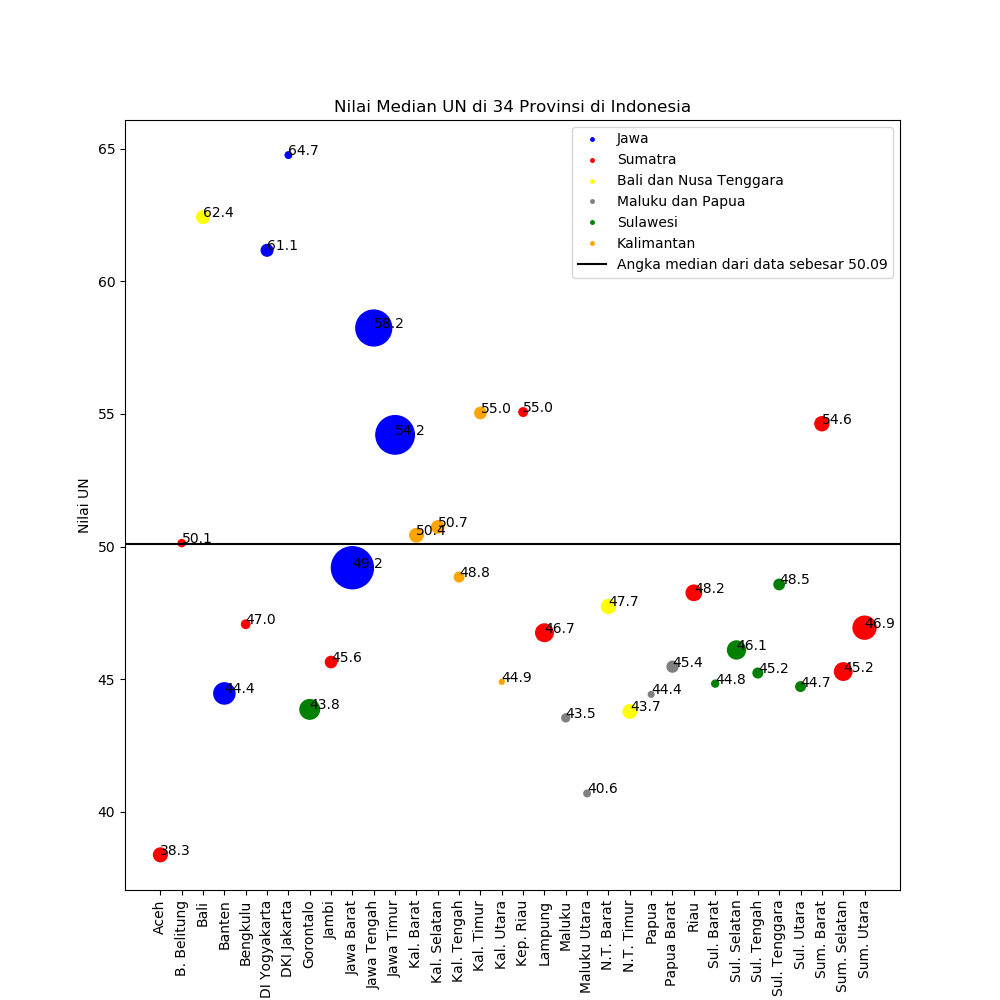

In [147]:
plt.figure(figsize=(10, 10))

plt.scatter(c, df_2['Median'], label=df_2['Provinsi'], c=warna, picker=5, s=size);
plt.axhline(read_data_indo['Rerata IPA tahun 2017'].median(), color='black');
plt.xticks(rotation='vertical');
for i in range(len(txt)):
    plt.annotate( txt[i], (c[i], nilai[i]), size=10)
plt.ylabel('Nilai UN')
plt.xlabel('Provinsi')
plt.title('Nilai Median UN di 34 Provinsi di Indonesia');

In [148]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=5, label='Jawa')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=5, label='Sumatra')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='.', linestyle='None',
                          markersize=5, label='Bali dan Nusa Tenggara')
grey_dot = mlines.Line2D([], [], color='grey', marker='.', linestyle='None',
                          markersize=5, label='Maluku dan Papua')
green_dot = mlines.Line2D([], [], color='green', marker='.', linestyle='None',
                          markersize=5, label='Sulawesi')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                          markersize=5, label='Kalimantan')
black_lines = mlines.Line2D([], [], color='black', linestyle='solid',
                          markersize=5, label='Angka median dari data sebesar {}'.format(str(read_data_indo['Rerata IPA tahun 2017'].median())[:5]))

plt.legend(handles=[blue_dot, red_dot, yellow_dot, grey_dot, green_dot, orange_dot, black_lines], loc=0)
#plt.legend(handles=[black_lines], loc=2)

plt.show()

In [149]:
def onpick(event):
    origin = df_2.iloc[event.ind[0]]['Provinsi']
    UN = df_2.iloc[event.ind[0]]['Median']
    plt.gca().set_title('Provinsi {}\n dengan nilai median UN sebesar {}'.format(origin, int(UN)))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8

# For Coursera

<IPython.core.display.Javascript object>


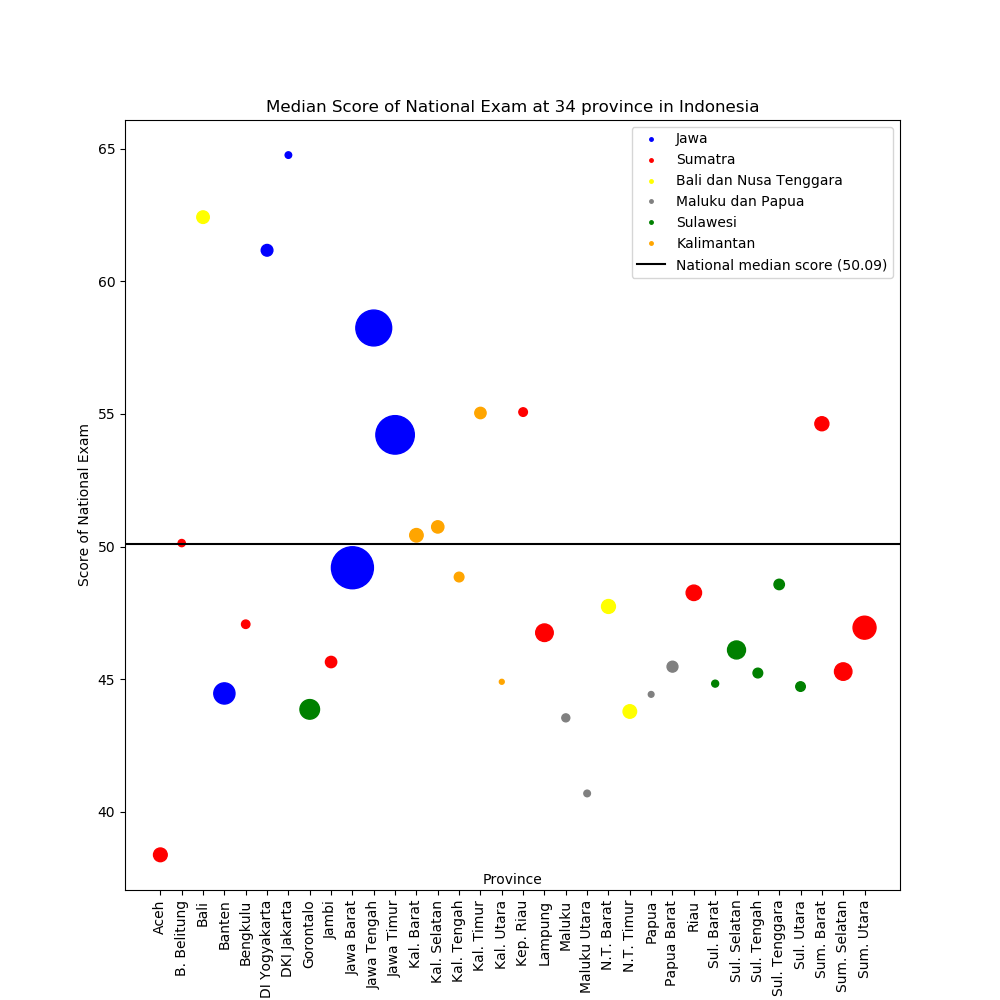

Text(0.5,1,'Median Score of National Exam at 34 province in Indonesia')

In [164]:
plt.figure(figsize=(10, 10))

plt.scatter(c, df_2['Median'], label=df_2['Provinsi'], c=warna, picker=5, s=size);
plt.axhline(read_data_indo['Rerata IPA tahun 2017'].median(), color='black');
plt.xticks(rotation='vertical');
#for i in range(len(txt)):
#    plt.annotate( txt[i], (c[i], nilai[i]), size=10)
plt.ylabel('Score of National Exam');
plt.xlabel('Province', labelpad=-90);
plt.title('Median Score of National Exam at 34 province in Indonesia')

In [165]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=5, label='Jawa')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=5, label='Sumatra')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='.', linestyle='None',
                          markersize=5, label='Bali dan Nusa Tenggara')
grey_dot = mlines.Line2D([], [], color='grey', marker='.', linestyle='None',
                          markersize=5, label='Maluku dan Papua')
green_dot = mlines.Line2D([], [], color='green', marker='.', linestyle='None',
                          markersize=5, label='Sulawesi')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                          markersize=5, label='Kalimantan')
black_lines = mlines.Line2D([], [], color='black', linestyle='solid',
                          markersize=5, label='National median score ({})'.format(str(read_data_indo['Rerata IPA tahun 2017'].median())[:5]))

plt.legend(handles=[blue_dot, red_dot, yellow_dot, grey_dot, green_dot, orange_dot, black_lines], loc=0)
#plt.legend(handles=[black_lines], loc=2)

plt.show()

In [163]:
def onpick(event):
    origin = df_2.iloc[event.ind[0]]['Provinsi']
    UN = df_2.iloc[event.ind[0]]['Median']
    plt.gca().set_title('Provinsi {}\n dengan nilai median UN sebesar {}'.format(origin, str(UN)[:4]))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9